# Part-1 - Data preprocessing

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### importing the training set

In [2]:
dataset_train=pd.read_csv("C:/Users/LENOVO/Desktop/NEURAL NETWORK/RNN/datasets/Google_Stock_Price_Train.csv")
# dataset_train=pd.read_csv('datasets/Google_Stock_Price_Train.csv')

training_set=dataset_train.iloc[:,1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### feature scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### creating a data structure with 60 timestamps and 1 output

In [5]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

#### reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building and Training the RNN

#### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


#### initialising RNN

In [8]:
regressor=Sequential()

#### adding the first LSTM layer and some dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### adding the second LSTM layer and some dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#### adding the third LSTM layer and some dropout regularisation

In [11]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#### adding the fourth LSTM layer and some dropout regularisation

In [12]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#### adding the output(DENSE) layer

In [13]:
regressor.add(Dense(units=1))

#### compiling the RNN and Fitting the RNN to the training set

In [14]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0450
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0058
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0055
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0051
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0055
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0054
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0053
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0055
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0048
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0037
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - lo

# Part 3 - Making the predictions and visualising the results

#### getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('datasets/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#### getting the predicted stock price of 2017

In [19]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


#### visualizing the results

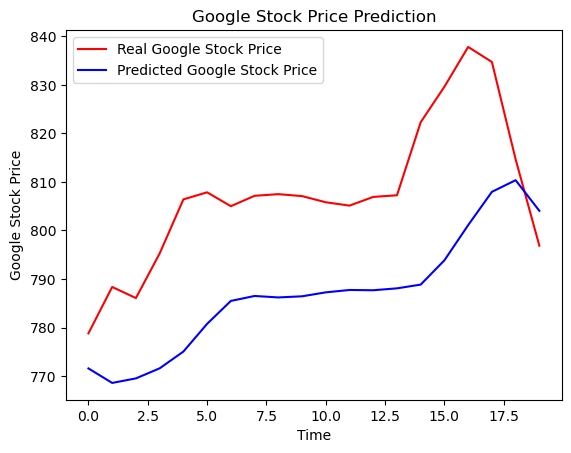

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
